<a href="https://colab.research.google.com/github/mopreni/data_science/blob/master/DS_Encuentro_04_Estadistica_marisol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estadística

El objetivo del siguiente notebook es, además de repasar conceptos de estadística, que presten atención a cómo se calculan algunas cosas con Numpy y se hacen gráficos con Matplotlib (¿qué?¿qué es eso? Lo veremos más adelante. Por ahora, solamente tienen que instalar la librería Matplotlib y correr las celdas).


## Distribuciones de probabilidad

El concepto de distribución de probabilidad es un concepto central en probabilidad y estadística y, por lo tanto, hay mucho para decir. Nos limitamos acá a los puntos más importantes.

Comencemos por un ejemplo: un dado de seis caras. La probabilidad de que al tirar el dado *salga* una cara es $1/6$. Si graficamos la probabilidad para cada resultado posible de tirar un dado, obtendríamos un gráfico como el siguiente:

In [0]:
import numpy as np
import matplotlib.pyplot as plt

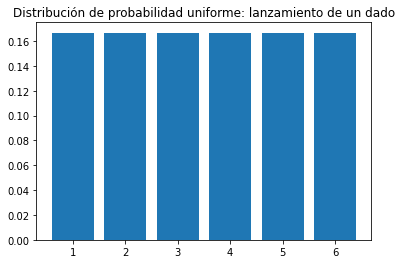

In [5]:
valores = np.arange(1,7)
probas = np.zeros(6) + 1/6
plt.bar(valores, probas)
plt.title('Distribución de probabilidad uniforme: lanzamiento de un dado')
# plt.savefig('distribucion_dado.png', dpi = 400)
plt.show()

En este caso, decimos que la distribución de probabilidad es *uniforme discreta*, ya que le asigna la misma probabilidad a los seis valores que pueden salir al tirar el dado. Si el dado estuviera cargado, ya no sería uniforme.

**Algunos detalles**:
1. El resultado de tirar un dado es un ejemplo de una *variable aleatoria*.
2. En el caso del dado, la variable aleatoria puede tomar valores *discretos* y *acotados* (limitados): 1, 2, 3, 4, 5 y 6
3. Existen variables aleatorias donde los posibles valores que puede tomar son continuos y no acotados. Veremos la distribución más famosa de ellas a continuación.

### Distribución Normal o Gaussiana

La distribución normal o gaussiana debe ser la distribución más famosa dentro de las distribuciones. Es una distribución de variable continua y aparece en una infinidad de ámbitos de la ciencia. Muchas variables asociadas a fenómenos naturales siguen una distribución gaussiana; un ejemplo típico es la estatura de las personas. Recomendamos entrar en la página de Wikipedia y prestar atención a la sección "Propiedades":
https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal

Los dos parámetros de una distribución Gaussiana son: su valor medio $\mu$ y su desviacíon estándar $\sigma$. Estos valores son *teóricos*, es decir, son propios de la distribución de probabilidad. Numpy nos provee de herramientas para generar valores aleatorios de distribuciones normales. A continuación generamos, usando `np.random.normal()`, muestras de dos distribuciones normales, con el mismo valor medio pero distinta desviación estándar. **Consultar** la ayuda de la función para entender bien qué hace.

In [6]:
mu = 2.0
sigma_1 = 5.0
sigma_2 = 2.0
muestras_1 = np.random.normal(loc = mu, scale = sigma_1, size = 400)
muestras_2 = np.random.normal(loc = mu, scale = sigma_2, size = 400)
print(muestras_1, muestras_2)

[ 1.05445533e+00  7.25773935e+00  5.89218935e+00  7.43143086e+00
 -1.13267966e+01 -5.42342476e-01 -1.43725590e+00  5.63468689e+00
  5.99431370e+00  6.97077238e+00  5.18321224e+00 -2.46712779e+00
  5.32786594e+00  9.04513757e+00  5.03127881e+00  5.36093039e+00
  3.72729275e+00 -6.36175796e-01  9.20559168e+00  1.30554259e+01
 -8.21749102e+00  3.02769241e+00  3.34110278e+00  5.89415960e+00
  2.89765119e+00 -7.63305917e-01  7.27889346e+00  4.17400530e+00
  2.81898213e+00 -1.60725766e+00  3.23286709e+00  6.66189914e+00
  7.12145447e+00 -1.20927005e+00 -4.44053044e-01 -2.10554414e+00
 -4.32368437e+00  9.85474933e+00 -5.06825852e+00  3.14527621e+00
 -7.29269618e-01  3.85177647e+00  1.17828979e+00 -3.30645361e+00
  6.93267077e+00 -2.77121087e+00  4.52069894e+00 -1.19066256e-01
  5.44928685e+00 -1.88920730e+00  9.70053756e-01  4.27236532e+00
 -1.10203425e+01 -3.78095135e+00 -6.21641717e+00  4.05958170e+00
  9.82948195e+00  2.67158344e+00  6.33537382e+00 -2.51307112e+00
  9.04613143e+00 -8.66527

Notar que son dos "tiras" de números, bastante largas y que a simple vista no nos dicen mucho. Mejor, podemos graficar su histograma (¿Qué es eso? Nuevamente, lo veremos durante las próximas clases, pero se pueden ir familiarizando).

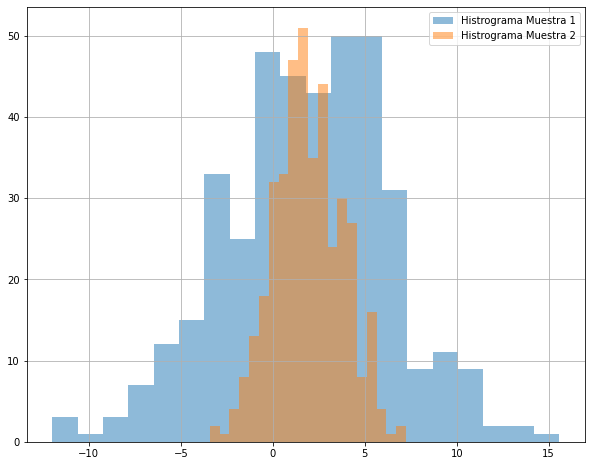

In [7]:
plt.figure(figsize = (10,8))
plt.hist(muestras_1, bins = 20, alpha = 0.5, label = 'Histrograma Muestra 1')
plt.hist(muestras_2, bins = 20, alpha = 0.5, label = 'Histrograma Muestra 2')
plt.legend()
plt.grid()
plt.show()

Volver a "generar" las muestas y hacer sus histogramas. ¿Cambió?¿Por qué?

### Promedio

Dados $n$ números $x_1,x_2,...,x_n$, el promedio o media es 

$$\overline{x} = \frac{1}{n}\sum_{i=1}^{n} x_i = \frac{x_1 + x_2 + ... + x_n}{n}$$

y lo podemos calcular *a mano* con Python

In [8]:
x_s = np.array([1,2,3,1,2,2,3,4,1,2,3,4,1,2,4])
n = len(x_s)

#forma lenta
x_mean = 0
for x in x_s:
    x_mean +=x
x_mean/=n
print(x_mean)

2.3333333333333335


o, mejor, usando Numpy

In [9]:
x_mean = np.mean(x_s)
print(x_mean)

2.3333333333333335


**Comentarios**:
1. Dado un conjunto de números, el promedio suele ser considerado el número más representativo de ese conjunto. Esto no siempre es así. Pensar por qué.
2. Al conjunto de números $x_1,...,x_n$ los pueden encontrar por el nombre de *población* o *muestra* (¡Ojo que no estamos diciendo que *población* y *muestra* sean lo mismo!).


### Desviación Estándar

La desviación estándar nos da una idea de cuán "dispersos" están los valores con respecto a su promedio. En general se usa la letra griega $\sigma$ para representarla (igual que el parámetro $\sigma$ de la distribución normal, ¡pero refieren a cosas distintas - aunque relacionadas!) o las siglas $SD$. Como no queremos que se confundan, preferimos la segunda opción.

$$ SD = \sqrt{\frac{\sum_{i=1}^{n} (x_i -\overline{x})^2}{n - 1}}$$

Numpy, nuevamente, tiene funciones ya incorporadas que calculan la desviación estándar de un arreglo:

In [10]:
x_std = np.std(x_s)
print(x_std)

1.0749676997731399


**Para investigar**: ¿qué es el parámetro `ddof` de esa función?

**ddof** : int, optional
Means Delta Degrees of Freedom. The divisor used in calculations is N - ddof, where N represents the number of elements. By default ddof is zero.

### Promedio y desviación estándar en una distribución Normal

En una distribución normal, el promedio de las muestras obtenidas *tiende* al valor medio $\mu$ de la distribución, y la desviación estándar *tiende* a la desviacíon estándar $\sigma$ de la distribución. Notar, entonces, que existen valores calculados (promedio, desviación estándar) y valores teóricos ($\mu$ y $\sigma$). Confundirlos entre sí es un error común.

In [0]:
mu = 8.5
sigma = 3.0
muestras = np.random.normal(loc = mu, scale = sigma, size = 400)

In [12]:
print('Valor medio teorico:', mu, '. Valor medio calculado:', muestras.mean())
print('Desviacion estandar teorica:', sigma, '. Desviacion estandar calculada:', muestras.std())

Valor medio teorico: 8.5 . Valor medio calculado: 8.395783277438461
Desviacion estandar teorica: 3.0 . Desviacion estandar calculada: 2.9789205711346334


¿Por qué no coinciden?¿Qué podemos hacer para que se parezcan cada vez más?

## Repaso: Estadística con Python/Numpy

Como vimos, en la librería Numpy ya hay funciones que calculan varios *estadísticos* dada una muestra


In [13]:
x_s = np.array([1,2,3,1,2,2,3,4,1,2,3,4,1,2,4])
x_mean = np.mean(x_s) #alternativamente, x_s.mean()
std = np.std(x_s) #alternativamente, x_s.std()
print(x_mean, std)

2.3333333333333335 1.0749676997731399


También hay funciones que generan muestras al azar de una distribución

In [14]:
promedio = 2.0
std = 5.0
muestras_normal = np.random.normal(loc = promedio, scale = std, size = 400)
print(muestras_normal[:10])

[ 0.50741181 -8.91273191  2.80661034  3.92824642  0.47043273 -0.15084893
 -7.79463264 -1.02181383  0.68914341  7.05548095]


Y con Matplotlib podemos hacer histogramas

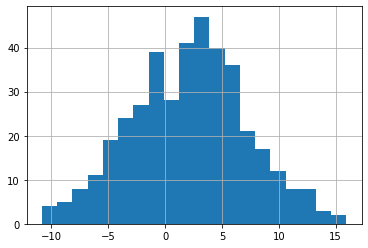

In [15]:
plt.hist(muestras_normal, bins = 20)
plt.grid()
plt.show()

## Ejercicio

¿Cuál será el promedio de los valores obtenidos de tirar muchas veces un dado? Vamos a tratar de responder esta pregunta *simulando* un dado y luego comparar con el valor teórico.

1. Obtener 30 muestras al azar de un dado. No hay una única forma de hacerlo. Pueden googlear o mirar la documentación del módulo *random* de Numpy (https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html). Pista: choice o randint.

In [40]:
muestras_randint = np.random.randint(1, high=6, size=30)
muestras_randint

array([5, 3, 2, 5, 3, 1, 3, 4, 1, 4, 2, 3, 1, 3, 5, 5, 4, 3, 3, 3, 1, 3,
       3, 1, 4, 3, 2, 5, 1, 1])

In [38]:
muestras_choice = np.random.choice(6, size=30)
muestras_choice

array([5, 5, 1, 5, 1, 4, 3, 4, 1, 4, 4, 1, 5, 2, 1, 1, 3, 5, 0, 2, 2, 4,
       1, 5, 1, 0, 5, 4, 5, 1])

2. Hacer el histograma. ¿Se parece a lo que esperaban? Volver esta celda y la anterior, pero obteniendo 1000 muestras.

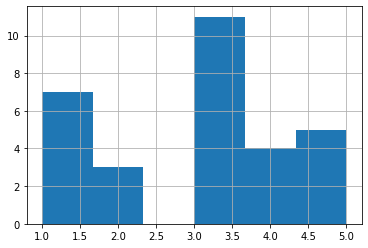

In [41]:
plt.hist(muestras_randint, bins = 6)
plt.grid()
plt.show() #consultar qué pasa con ese intervalo

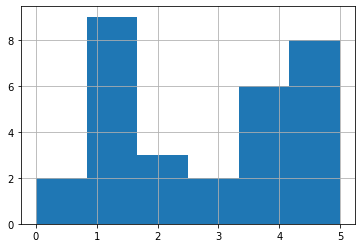

In [39]:
plt.hist(muestras_choice, bins = 6)
plt.grid()
plt.show()

3. Obtener el valor medio y la desviación estándar de la distribución.

In [0]:
COMPLETAR

4. Averiguar cuales son los valores *esperados*. ¿Están cerca de los valores que obtuvieron ustedes? Pista: mirar en Wikipedia (en inglés) las propiedades de la distribución uniforme discreta.

5. ¿Cómo se modifica si el dado está *cargado*?. Simular un dado cargado (pueden *cargar* el número que quieran). Pista: choice

In [0]:
# a. Crear un arreglo que asigne probabilidades a cada valor del dado. Recordar que las probabilidades deben sumar 1
probabilidades = COMPLETAR
# probabilidades = probabilidades/probabilidades.sum() # puede ser util

In [0]:
# b. Generar las muestras
COMPLETAR

In [0]:
COMPLETAR